# Notebook for the analysis of MIPT data

### Setting up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Separate the categorical and integer features.

In [2]:
sns.set(font_scale=1.4)

df = pd.read_excel(r'C:\Users\Saro\Dropbox\5 sem\Хлам\контрабанда\base.xlsx')

department_map = {1: 'ФРКТ', 2: 'ЛФИ', 3: 'ФАКТ', 4: 'ФЭФМ', 5: 'ФПМИ', 6: 'ФБМФ', 7: 'ИНБИКСТ', 9: 'ФБВТ', 1e6: 'unknown'}
department_names = [department_map[x] for x in department_map.keys()]

# We'll identify Зюзино with the 0th dorm so that we can treat the dorm column as integer
df['հանրակացարան'] = df['հանրակացարան'].apply(lambda x: 0 if x == 'Зюзино' else x)

integer_features = ['ֆակուլտետ', 'կուրս (իմ հետ տարբերությունը)', 'հանրակացարան', 'սենյակ']
categorical_features = ['ֆակուլտետ', 'տրամադրեց']
for i in integer_features:
    df[i] = df[i].fillna(1e6)

for (features, dtype) in [(integer_features, 'int64'), (categorical_features, 'category')]:
    for feature in features:
        df[feature] = df[feature].astype(dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   սուբյեկտ                       334 non-null    object  
 1   հաշվառված որպես                337 non-null    object  
 2   ֆակուլտետ                      337 non-null    category
 3   խումբ                          236 non-null    object  
 4   կուրս (իմ հետ տարբերությունը)  337 non-null    int64   
 5   հատկանշական                    337 non-null    object  
 6   date added                     337 non-null    object  
 7   vk                             337 non-null    object  
 8   telegram                       113 non-null    object  
 9   տրամադրեց                      329 non-null    category
 10  հանրակացարան                   337 non-null    int64   
 11  սենյակ                         337 non-null    int64   
dtypes: category(2), int64(3), object(7)


In [3]:
df.head()

,սուբյեկտ,հաշվառված որպես,ֆակուլտետ,խումբ,կուրս (իմ հետ տարբերությունը),հատկանշական,date added,vk,telegram,տրամադրեց,հանրակացարան,սենյակ
0,Маланчук София,lvacq,5,Б05-879,1,աշխատում ա պրոֆկոմում տոլի դրա պես մի տեղ; մի ...,28.09.2021,id234539359,dcamfox,Shærъё,7,224
1,Андрей Самошин,angljarit,4,Б04-901,0,"ժարիտ ա անում անգլերենը, սիրում ա շփվել մարդկա...",28.09.2021,id124528340,NaN,Shærъё,1000000,1000000
2,Мария Леонтьева,arj,5,Б05-124,-2,իրականում կուրսերի տարբերությունը պիտի -1 լինե...,28.09.2021,id208137179,NaN,Shærъё,2,214
3,Алла Зайцева,allaagbar,5,Б05-907,0,առաջին անգամ հիշում եմ իրա հետ անգլերենի դասի ...,28.09.2021,id147854333,NaN,Shærъё,7,233
4,Екатерина Бородич,ayesduchptianeir,1000000,NaN,1000000,իմ 5-րդ սեմեստրի մետօպտի դասատուն,03.11.2021,id106375191,e_borodich,Shærъё,1000000,1000000


Now we are ready for analyzing our dataset.

### How much data was provided by each contributor?

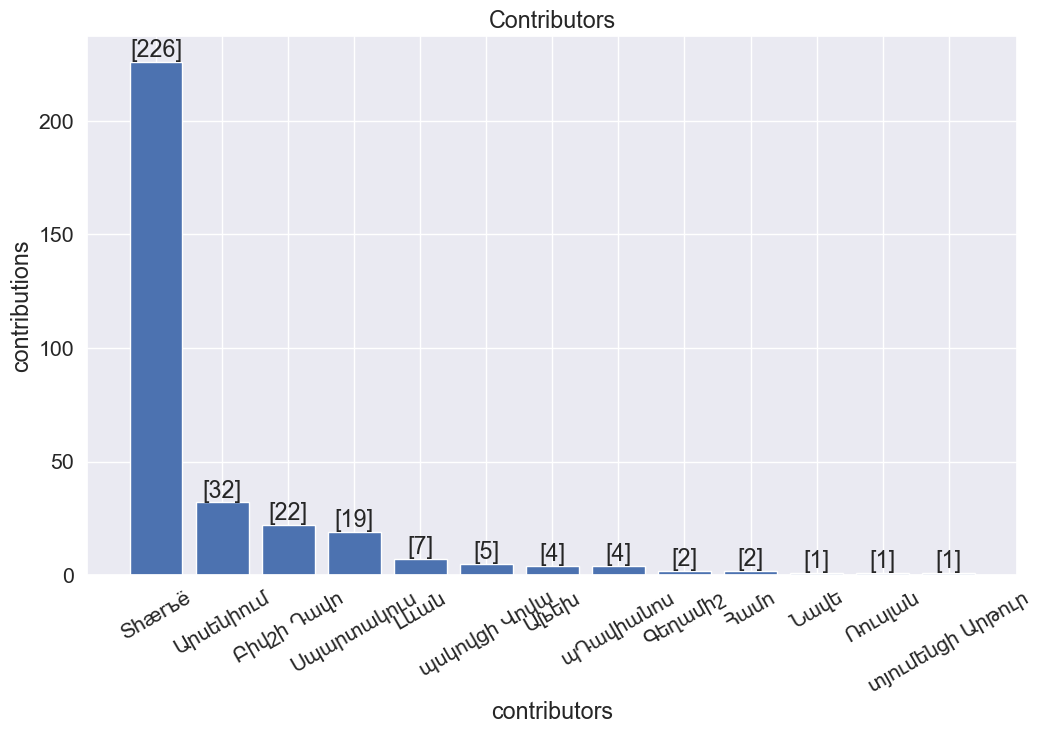

In [4]:
contributors = df[['սուբյեկտ', 'տրամադրեց']].groupby(by='տրամադրեց').count().sort_values(by='սուբյեկտ', ascending=False)
plt.figure(figsize=(12, 7))
bars = plt.bar(contributors.index, contributors['սուբյեկտ'])
plt.bar_label(bars, labels=contributors.values)
plt.title('Contributors')
plt.xlabel('contributors')
plt.ylabel('contributions')
plt.xticks(rotation=30)
plt.show()

### How many students of each department are present in the database?

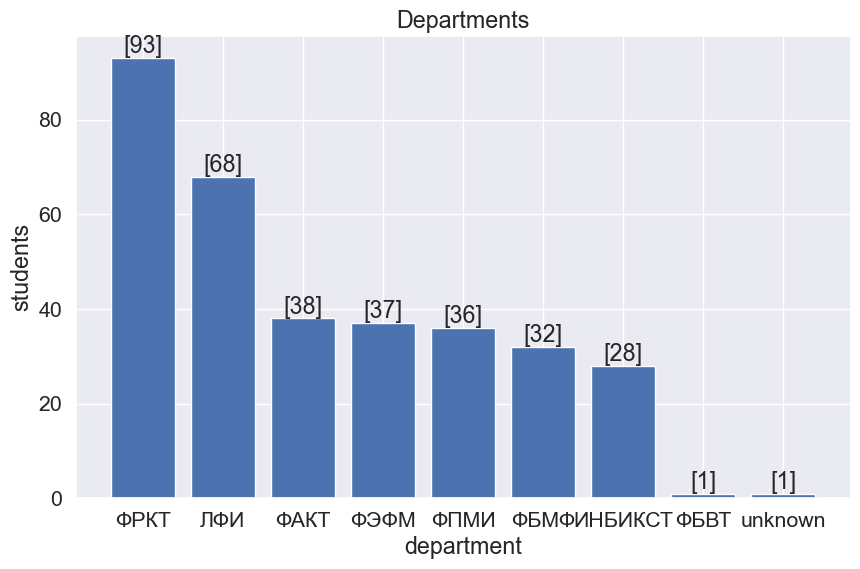

In [5]:
departments = df[['սուբյեկտ', 'ֆակուլտետ']].groupby(by='ֆակուլտետ').count().sort_values(by='սուբյեկտ', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(department_names, departments['սուբյեկտ'])
plt.bar_label(bars, labels=departments.values)
plt.title('Departments')
plt.xlabel('department')
plt.ylabel('students')
plt.show()

### How do contributors and the distribution of people in the database by departments correlate with each other?

<Axes: title={'center': 'Distribution by contributors of departments where they provided people from'}, xlabel='ֆակուլտետ', ylabel='տրամադրեց'>

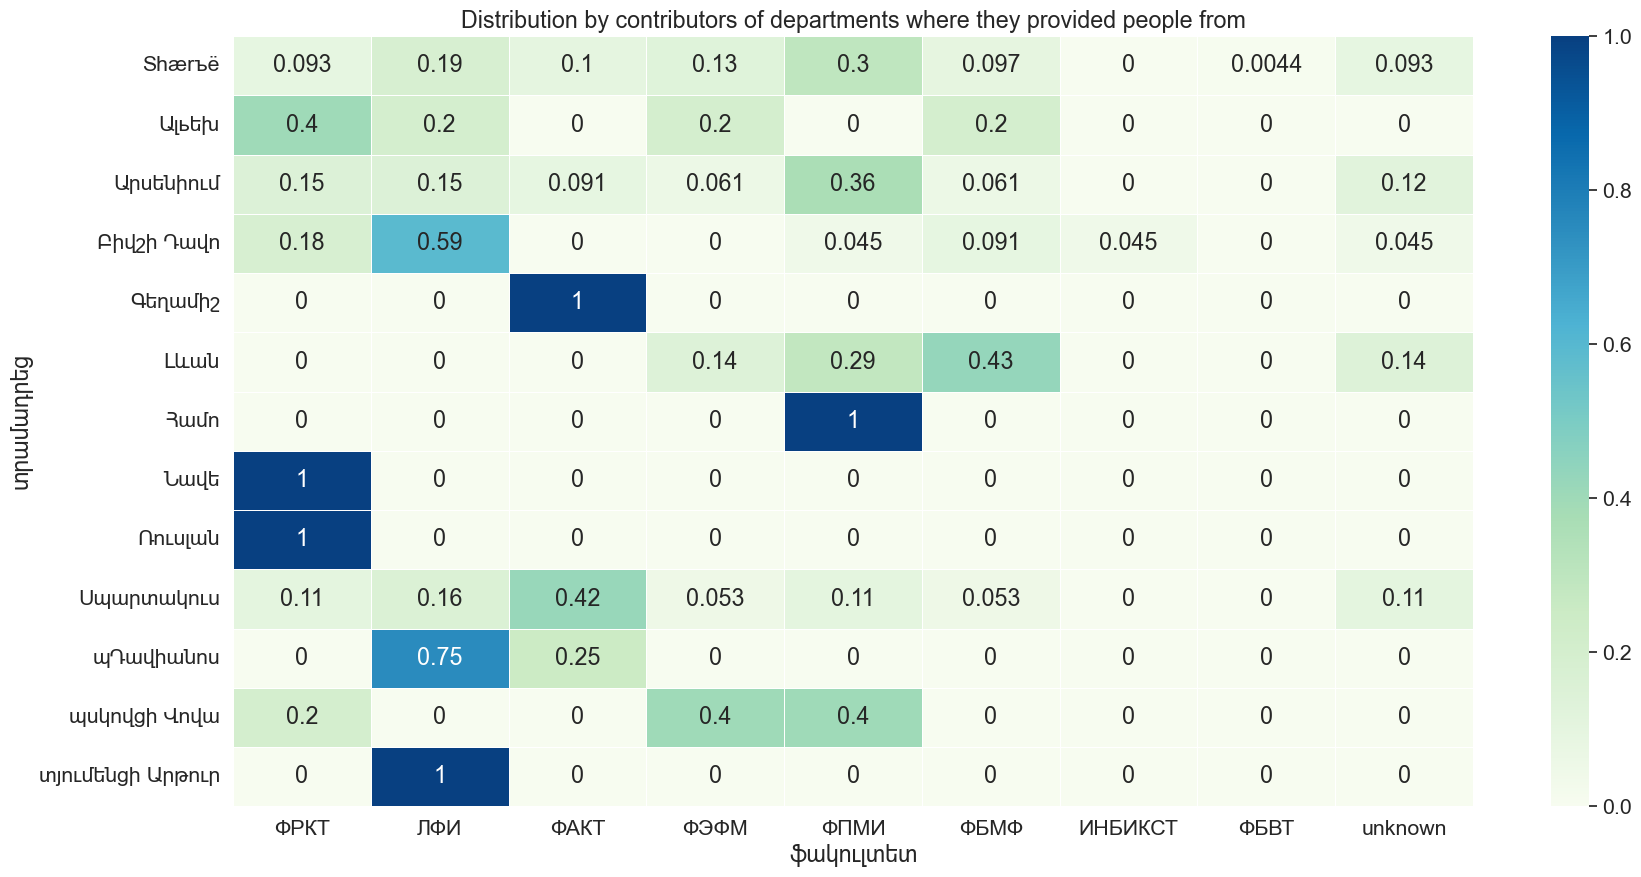

In [6]:
mat = pd.crosstab(df['տրամադրեց'], df['ֆակուլտետ']).rename(columns=department_map)

# normalize
for row in mat.index:
    mat.loc[row] /= mat.loc[row].sum()

fig, ax = plt.subplots(figsize=(20,10))
matrix = sns.heatmap(mat, annot=True, linewidths=0.5, ax=ax, cmap='GnBu')
matrix.set_xticklabels(matrix.get_xticklabels(), rotation=0)
ax.set_title('Distribution by contributors of departments where they provided people from')
matrix

As one can see on the table Սպարտակուս, Լևան and Բիվշի Դավո mainly have given off their department-mates, while Shærъё's provided people's departments have a distribution close enough to the uniform one.

### How many subjects are present from each department of each year?

<Axes: title={'center': 'Distribution by years and departments'}, xlabel='կուրս (իմ հետ տարբերությունը)', ylabel='ֆակուլտետ'>

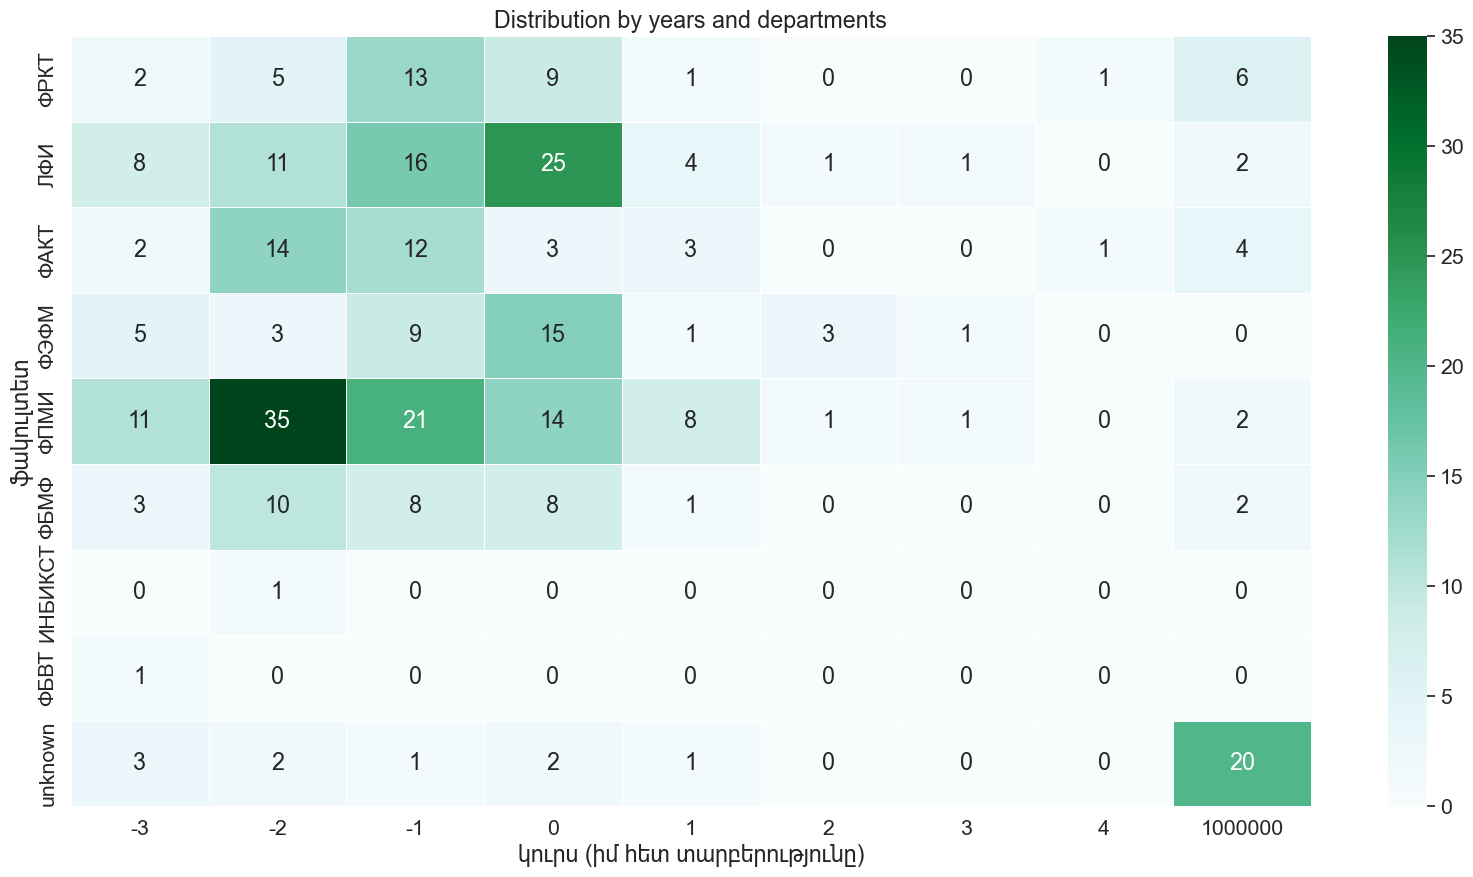

In [7]:
mat = pd.crosstab(df['ֆակուլտետ'], df['կուրս (իմ հետ տարբերությունը)']).rename(index=department_map)

fig, ax = plt.subplots(figsize=(20,10))
matrix = sns.heatmap(mat, annot=True, linewidths=0.5, ax=ax, cmap='BuGn')
ax.set_title('Distribution by years and departments')
matrix

### How many students of each age are present?

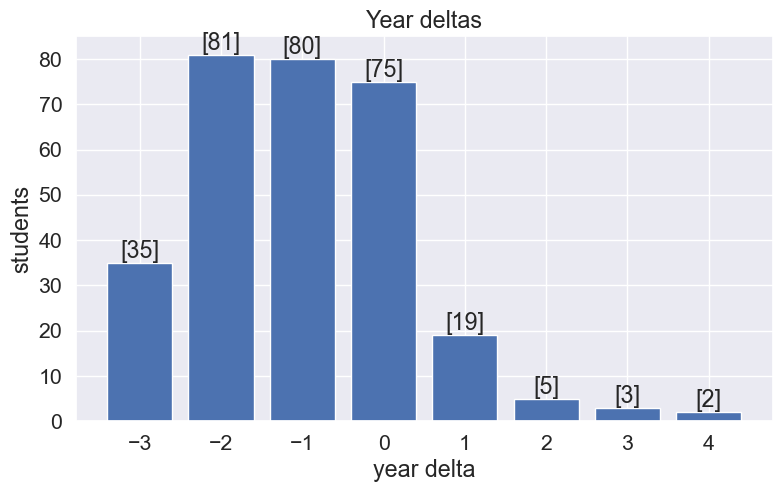

In [8]:
year_deltas = df[df['կուրս (իմ հետ տարբերությունը)'].isin([-3, -2, -1, 0, 1, 2, 3, 4])][['սուբյեկտ', 'կուրս (իմ հետ տարբերությունը)']].groupby(by='կուրս (իմ հետ տարբերությունը)').count().sort_values(by='սուբյեկտ', ascending=False)
plt.figure(figsize=(9, 5))
bars = plt.bar(year_deltas.index, year_deltas['սուբյեկտ'])
plt.bar_label(bars, year_deltas.values)
plt.title('Year deltas')
plt.xlabel('year delta')
plt.ylabel('students')
plt.show()

### Which groups we have the most data about?

In [9]:
grouped_by_groups = df.groupby(by='խումբ').count()['սուբյեկտ']
fortunate_groups = grouped_by_groups[grouped_by_groups > 1]
fortunate_groups

խումբ
Б01-004    2
Б01-006    4
Б01-009    2
Б01-902    2
Б02-003    2
Б02-004    2
Б02-014    2
Б02-110    3
Б02-208    2
Б02-910    3
Б02-922    2
Б02-925    3
Б02-928    2
Б03-001    2
Б03-002    2
Б03-006    3
Б03-105    2
Б03-106    4
Б04-003    2
Б04-004    2
Б04-005    2
Б04-201    2
Б04-901    4
Б04-902    3
Б04-903    2
Б04-905    2
Б05-003    2
Б05-007    2
Б05-012    2
Б05-027    2
Б05-052    2
Б05-102    2
Б05-103    2
Б05-106    2
Б05-108    2
Б05-112    2
Б05-124    3
Б05-132    2
Б05-153    4
Б05-156    2
Б05-211    2
Б05-225    2
Б05-226    3
Б05-822    2
Б05-903    2
Б05-904    2
Б05-907    2
Б05-927    2
Б06-001    3
Б06-103    4
Б06-105    3
Б06-109    2
Б06-906    2
Name: սուբյեկտ, dtype: int64

In [10]:
df[df['խումբ'].isin(fortunate_groups.index)].sort_values(by='խումբ')

,սուբյեկտ,հաշվառված որպես,ֆակուլտետ,խումբ,կուրս (իմ հետ տարբերությունը),հատկանշական,date added,vk,telegram,տրամադրեց,հանրակացարան,սենյակ
118,Руслан Москвитин,Ruslan,1,Б01-004,-1,Նվերի ընկերն ա; յակուտ ա,29.06.2022,id503856646,NaN,Shærъё,11,265
291,Владислав Киселев,DarthVader,1,Б01-004,-1,ըստ Ռուսլանի՝ իրա խմբեցին ա; միշտ ռեսպիրատորով...,02.05.2023,id226652784,NaN,Ռուսլան,1000000,1000000
76,Софья Савельева,mecaknocavor,1,Б01-006,-1,վերջերս ձեռք ա բերել ընկեր; եղել ա Б01-002 գռո...,15.06.2022,id192525364,sofyafyaa,Ալьեխ,13,1109
206,Александр Старцев,miki2,1,Б01-006,-1,դիվաններին ա երևում,27.11.2022,id277175843,NaN,Shærъё,1000000,1000000
253,Артём Сагиян,hay3,1,Б01-006,-1,յավնի երևում էր որ հայ ա; էն դենյ կարյերիի քաշ...,02.03.2023,id309993782,NaN,Shærъё,1000000,1000000
...,...,...,...,...,...,...,...,...,...,...,...,...
192,Лейла Клестова,pijilik,6,Б06-105,-2,"մանր-մունր աղջիկ ա, բոտալկեքում ա երևում; պասվ...",13.10.2022,id216433267,NaN,Shærъё,8,203
181,Onur Dosi,ez,6,Б06-109,-2,"անգլիախոս գռուպեքից ա, բոյլուխ տավար եզ ա, մի ...",26.09.2022,id707682451,NaN,Shærъё,1000000,1000000
182,Lilas Altaweel,eziynkeruhi,6,Б06-109,-2,ez-ի ընկերուհին ա,26.09.2022,id699070542,NaN,Shærъё,1000000,1000000
73,Анна Смирнова,ravnyassmirno,6,Б06-906,0,համարյա միշտ կարճ ա հագնվում; տղամարդու կարիք ...,15.06.2022,id583137072,NaN,Արսենիում,8,201


### Which rooms we have the most data about?

In [11]:
grouped_by_rooms = df[df['հանրակացարան'] != 1e6].groupby(['հանրակացարան', 'սենյակ']).count()['սուբյեկտ']
fortunate_rooms = grouped_by_rooms[grouped_by_rooms > 1]
fortunate_rooms

հանրակացարան  սենյակ
2             208       3
              214       2
              221       2
              404       2
              405       3
3             323       2
6             203       2
              228       3
              531       2
7             222       2
              232       2
              234       2
8             201       2
              202       4
              203       2
              204       3
              205       3
              301       2
              501       2
              502       2
              603       2
12            611       2
              908       2
13            121       2
              303       2
              1108      2
Name: սուբյեկտ, dtype: int64

In [12]:
df[pd.Series(zip(df['հանրակացարան'], df['սենյակ'])).isin(fortunate_rooms.index)].sort_values(['հանրակացարան', 'սենյակ'])

,սուբյեկտ,հաշվառված որպես,ֆակուլտետ,խումբ,կուրս (իմ հետ տարբերությունը),հատկանշական,date added,vk,telegram,տրամադրեց,հանրակացարան,սենյակ
8,Лидия Троешестова,lida,5,Б05-022,-1,"Լյովն իրան էր ուզում, բայց ինչ որ խաղ դոձիկ Լյ...",06.12.2021,id272578912,leeda36,NaN,2,208
303,Наталья Черевичная,koreamol2,5,Б05-226,-3,բոտալկի բնակիչներից ա; քֆուրչի ա; նախընտրում ա...,14.05.2023,id258458227,Nicole_Handleson,պսկովցի Վովա,2,208
307,Аня Парфенова,shrek,5,Б05-226,-3,քանի մը անգամ տեսել եմ բոտալկեք; կլիչկեն՝ Ռուբոյի,28.05.2023,id265834202,NaN,Արսենիում,2,208
2,Мария Леонтьева,arj,5,Б05-124,-2,իրականում կուրսերի տարբերությունը պիտի -1 լինե...,28.09.2021,id208137179,NaN,Shærъё,2,214
30,Лена Дудко,chaxkal,5,NaN,-2,վախտին Լյովն ուզել ա; huawei ա աշխատում; շատ ա...,10.06.2022,id359628311,NaN,Shærъё,2,214
22,Даша Хвоя,xuynya,5,Б05-033,-1,Առաջին անգամ տեսել եմ լողի մրցում նայելուց (ին...,05.04.2022,id148233666,dkhvoya,Լևան,2,221
310,Маша Зацепина,kacnaxbyur,5,Б05-220,-3,կզակը առաջ ա; ըստ Համոյի սովորաբար հագնում ա կ...,30.05.2023,id264852618,zmash0405,Համո,2,221
116,Маша Садовина,xaxaliqkrox,5,Б05-128,-2,"մի անգամ տեսել եմ, թե ոնց ա մի քանի ջահելների ...",29.06.2022,id236173729,NaN,Shærъё,2,404
298,Полина Дунаева,Ashotidurekac,5,Б05-127,-2,Աշոտի դուրն ա եկել լսել եմ; շատ էր երևում բոտա...,03.05.2023,id308432718,red_hoody,Shærъё,2,404
190,Анастасия Казакова,annormal,5,Б05-012,-1,Արսենը զզվում ա իրանից,09.10.2022,id499398594,Nastyaprocas,NaN,2,405


### Other examples.

Who do we know a year younger from the fourth school?

In [13]:
df[(df['ֆակուլտետ'] == 4) & (df['կուրս (իմ հետ տարբերությունը)'] == -1)]

,սուբյեկտ,հաշվառված որպես,ֆակուլտետ,խումբ,կուրս (իմ հետ տարբերությունը),հատկանշական,date added,vk,telegram,տրամադրեց,հանրակացարան,սենյակ
37,Наталия Семенова,Natalia,4,Б04-004,-1,"պարում մարում ա խաղերի ժամանակ, շատ սիրուն ա, ...",13.06.2022,id336543082,NaN,Shærъё,8,202
63,Лиза Курбатова,zaebalietimalchiki,4,Б04-002,-1,"մի անգամ տեսել եմ inqnavstah-ի հետ, Արսենն էնք...",15.06.2022,id309961609,NaN,Shærъё,8,5
125,Анастасия Касатикова,hamest,4,Б04-003,-1,"մի հատ մեջքին ФПФЭ գրած ընկեր ուներ, որ նենց կ...",29.06.2022,id314404901,NaN,Shærъё,8,4
126,Иветта Соловьева,jutakahar,4,Б04-007,-1,ջութակ-մութակ ա նվագում միջոցառումներին,29.06.2022,id281968824,NaN,Shærъё,8,301
135,Михаил Голощапов,boy,4,Б04-005,-1,"բոտալկեքում շատ ա երևացել, բոյով ա ու միշտ վախ...",13.07.2022,id367241450,NaN,Shærъё,8,8
210,Дмитрий Нураев,terrorist,4,Б04-005,-1,"իրան գիտեմ դեռևս երկրորդ կուրսից, հետս ֆիզկուլ...",18.01.2023,id149648329,seaxbeamer,Shærъё,8,304
258,Катя Баганцова,lavegtanq,4,Б04-003,-1,երևում ա բոտալկեք; vaxajammayr-ի հետ մի անգամ ...,03.03.2023,id167796827,NaN,Լևան,8,504
286,Катя Новогрудская,Nataliayiharevan,4,Б04-001,-1,կոխեց վկով ռեկոմենդացիա բերելով; վերջապես սրան...,30.04.2023,id169779106,NaN,Shærъё,8,202
296,Наталья Котова,avatar,4,Б04-004,-1,քանի մը անգամ տեսել եմ,03.05.2023,id270390587,NaN,Shærъё,8,302
